### import bibliotek

In [21]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt

### wczytanie i przygotowanie danych

In [2]:
#wyświetlenie kodu z pobranymi opniniami 
print(*[filname.removesuffix(".json") for filname in os.listdir("./opinions")],  sep="\n")


157123293
17277659
84514582


In [8]:
#wczytanie danych z liku .json do obiektu przypominającego tabele
product_id = input("podaj id produktu")
opinions = pd.read_json(f"./opinions/{product_id}.json")


In [9]:
# transformacja danych 
opinions.stars = opinions.stars.apply(lambda s: s.split("/")[0].replace(",",".")).astype(float)
opinions.likes = opinions.likes.astype(int)
opinions.dislikes = opinions.dislikes.astype(int)

### Podstawowe statystyki 

In [17]:
reviews_count = len(opinions.index)
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
avarage_stars = round(opinions.stars.mean(),2)
pros_cons_count =opinions.apply(lambda r: bool(r.pros) and bool(r.cons), axis=1).sum()

print((f"liczba opini o produkcie: {reviews_count}"))
print((f"liczba opini przy których podana  została lista zalet: {pros_count}"))
print((f"liczba opini przy których podana  została lista wad: {cons_count}"))
print((f"liczba opini przy których podana  została lista zalet oraz wad: {pros_cons_count}"))
print((f"średnia liczba gwiazdek produktu: {avarage_stars}"))

liczba opini o produkcie: 10
liczba opini przy których podana  została lista zalet: 0
liczba opini przy których podana  została lista wad: 0
liczba opini przy których podana  została lista zalet oraz wad: 0
średnia liczba gwiazdek produktu: 4.2


In [18]:
pros = opinions.pros.explode().value_counts()
cons = opinions.cons.explode().value_counts()

Series([], Name: count, dtype: int64)

 ### Wykresy

In [37]:
recomandations = opinions.recomendation.value_counts(dropna = False).reindex( ['Nie polecam', 'Polecam',None], fill_value=0)

<Axes: >

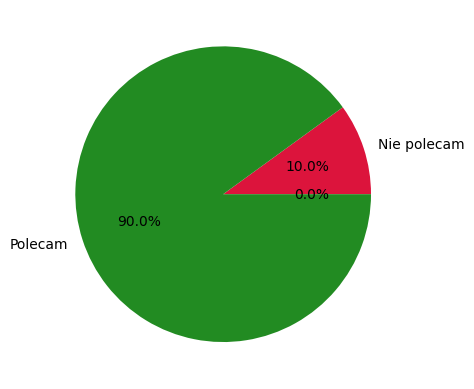

In [38]:
recomandations.plot.pie(
    label = "",
    labels= ["Nie polecam","Polecam","Nie mam zdania"],
    colors = ["crimson","forestgreen","lightyellow"],
    autopct = "%1.1f%%",
)